# 1. Read and explore the given dataset

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from math import sqrt
%matplotlib inline

In [2]:
columns = ['userID', 'productID', 'ratings','timestamp']

recomm_df = pd.read_csv('ratings_Electronics.csv',names=columns)

In [3]:
recomm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userID     object 
 1   productID  object 
 2   ratings    float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [4]:
recomm_df.head()

,userID,productID,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [5]:
recomm_df.shape

(7824482, 4)

In [6]:
#Dropping timestamp column
recomm_df = recomm_df.drop('timestamp', axis=1)

In [7]:
#Check for missing values
recomm_df.isna().sum()

userID       0
productID    0
ratings      0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009C80783EE0>]],
      dtype=object)

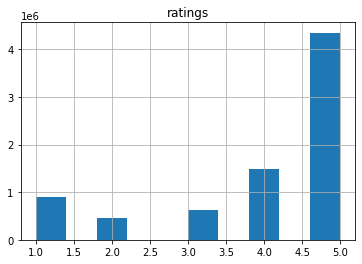

In [8]:
#Plot histograms
recomm_df.hist('ratings',bins = 10)

In [9]:
#Unique users
recomm_df.userID.value_counts()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
A2C9C7MVRPBSY1      1
A3N6S9LMLZ255O      1
A3K2WVAGZBBVMX      1
A3Q1X31DJQTAAU      1
A15GPUYZ5BT6KP      1
Name: userID, Length: 4201696, dtype: int64

In [10]:
print('Number of unique users', len(recomm_df['userID'].unique()))
print('Number of unique products', len(recomm_df['productID'].unique()))
print('Unique Ratings', recomm_df['ratings'].unique())

Number of unique users 4201696
Number of unique products 476002
Unique Ratings [5. 1. 3. 2. 4.]


In [12]:
min_ratings1 = recomm_df[(recomm_df['ratings'] < 2.0)]
print('Number of products rated low',len(min_ratings1['productID'].unique()))

Number of products rated low 176283


In [13]:
med_ratings1 = recomm_df[(recomm_df['ratings'] > 2.0) & (recomm_df['ratings'] < 4.0)]
print('Number of products rated medium',len(med_ratings1['productID'].unique()))

Number of products rated medium 152827


In [14]:
max_ratings1 = recomm_df[recomm_df['ratings'] >= 4.0]
print('Number of products rated high',len(max_ratings1['productID'].unique()))

Number of products rated high 410110


In [15]:
avg_rating_prod = recomm_df.groupby('productID').sum() / recomm_df.groupby('productID').count()
avg_rating_prod.drop('userID', axis=1,inplace =True)
print ('Top 10 highly rated products \n',avg_rating_prod.nlargest(10,'ratings'))

Top 10 highly rated products 
             ratings
productID          
0132793040      5.0
0321732944      5.0
059400232X      5.0
0594033934      5.0
0594287995      5.0
0594450209      5.0
0594450705      5.0
0594511488      5.0
0594514789      5.0
0594549558      5.0


# 2. Take a subset of the dataset to make it less sparse/ denser.

In [16]:
userID = recomm_df.groupby('userID').count()

In [17]:
top_user = userID[userID['ratings'] >= 50].index

In [18]:
topuser_ratings_df = recomm_df[recomm_df['userID'].isin(top_user)]
topuser_ratings_df.shape

(125871, 3)

In [19]:
topuser_ratings_df.head()

,userID,productID,ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


In [20]:
topuser_ratings_df.sort_values(by='ratings', ascending=False).head()

,userID,productID,ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
4256669,A680RUE1FDO8B,B004M8RWDE,5.0
4258497,AOMEH9W6LHC4S,B004M8SBNE,5.0
4258199,A2GKMXRLI7KLFP,B004M8SBD4,5.0
4258099,A1UNJ46NSB352E,B004M8SBCK,5.0


In [21]:
#Keep the users only who have given 50 or more number of ratings
prodID = recomm_df.groupby('productID').count()
top_prod = prodID[prodID['ratings'] >= 50].index
top_ratings_df = topuser_ratings_df[topuser_ratings_df['productID'].isin(top_prod)]
top_ratings_df.sort_values(by='ratings', ascending=False).head()

,userID,productID,ratings
492,A3CLWR1UUZT6TG,0972683275,5.0
4220481,A2AY4YUOX2N1BQ,B004KJE8FU,5.0
4217715,A2Q204DY2L7YRP,B004K8WPUQ,5.0
4218748,A87CILADRIZW0,B004KA8Y4U,5.0
4219205,A11KZ906QD08C5,B004KCI80I,5.0


In [22]:
top_ratings_df.shape

(79182, 3)

# 3. Split data randomly into a train and test dataset

In [23]:
train_data, test_data = train_test_split(top_ratings_df, test_size = 0.30, random_state=0)

In [24]:
train_data.head()

,userID,productID,ratings
3679937,A2W0XCWOK3MW6F,B003Y74AXO,3.0
3603561,A2E1EFNIZL2FVA,B003VANO7C,5.0
6945634,AR3EVUQF0AC7R,B00ARB5FLQ,4.0
2732999,A38RMU1Y5TDP9,B002NGVY8G,1.0
7715921,A1JZFGZEZVWQPY,B00GRNUO2I,3.0


In [25]:
test_data.head()

,userID,productID,ratings
6562653,AWH2AY17ZU7W2,B009A6CZ30,5.0
1001830,A1SHHQSPOWR00F,B000HGIWN4,3.0
3904732,A1PVJICI412IN4,B00466X9SY,5.0
7600678,AGYH5U11ZKPFB,B00F3ZN0CC,4.0
2743475,AMKNPIDFLRFMP,B002O3W2OI,2.0


# 4. Build popularity recommender model

In [26]:
train_data_grouped = train_data.groupby('productID').mean().reset_index()
train_data_grouped.head()

,productID,ratings
0,0972683275,4.5
1,1400501466,3.0
2,1400501520,5.0
3,1400501776,4.0
4,1400532620,1.0


In [27]:
train_data_sort = train_data_grouped.sort_values(['ratings', 'productID'], ascending=False)
train_data_sort.head()

,productID,ratings
14854,B00L3YHF6O,5.0
14851,B00K7O2DJU,5.0
14850,B00K4VQZCM,5.0
14849,B00K0OBEE2,5.0
14845,B00JLADOGW,5.0


In [28]:
train_data.groupby('productID')['ratings'].count().sort_values(ascending=False).head(10)

productID
B0088CJT4U    135
B003ES5ZUU    128
B007WTAJTO    123
B000N99BBC    122
B008DWCRQW    102
B00829TIEK    102
B00829THK0     98
B002R5AM7C     94
B004CLYEDC     82
B004CLYEFK     76
Name: ratings, dtype: int64

In [29]:
ratings_mean_count = pd.DataFrame(train_data.groupby('productID')['ratings'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(train_data.groupby('productID')['ratings'].count())
ratings_mean_count.head()

,ratings,rating_counts
productID,,
0972683275,4.5,2
1400501466,3.0,4
1400501520,5.0,1
1400501776,4.0,1
1400532620,1.0,1


In [30]:
pred_df = test_data[['userID', 'productID', 'ratings']]
pred_df.rename(columns = {'ratings' : 'true_ratings'}, inplace=True)
pred_df = pred_df.merge(train_data_sort, left_on='productID', right_on = 'productID')
pred_df.head(3)

,userID,productID,true_ratings,ratings
0,AWH2AY17ZU7W2,B009A6CZ30,5.0,4.5
1,A316XO4RWX21YN,B009A6CZ30,4.0,4.5
2,A1UNJ46NSB352E,B009A6CZ30,5.0,4.5


In [31]:
pred_df.rename(columns = {'ratings' : 'predicted_ratings'}, inplace = True)
pred_df.head()

,userID,productID,true_ratings,predicted_ratings
0,AWH2AY17ZU7W2,B009A6CZ30,5.0,4.5
1,A316XO4RWX21YN,B009A6CZ30,4.0,4.5
2,A1UNJ46NSB352E,B009A6CZ30,5.0,4.5
3,A1CMD08Z49PGKQ,B009A6CZ30,5.0,4.5
4,A1F9Z42CFF9IAY,B009A6CZ30,5.0,4.5


In [34]:
MSE = metrics.mean_squared_error(pred_df['true_ratings'], pred_df['predicted_ratings'])
print('The RMSE value for Popularity Recommender model is', sqrt(MSE))

The RMSE value for Popularity Recommender model is 1.0914119718039657


# 5. Build collaborative filtering model

In [37]:
import surprise
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [39]:
reader = Reader(rating_scale=(0.5, 5.0))

In [40]:
data = Dataset.load_from_df(top_ratings_df[['userID', 'productID', 'ratings']],reader)

In [41]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.3,random_state=0)

In [42]:
type(trainset)

surprise.trainset.Trainset

In [43]:
#Training model
#KNN with Means
algo_user = KNNWithMeans(k=10, min_k=6, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [46]:
#SVD
from surprise import SVD
svd_model = SVD(n_factors=50,reg_all=0.02)
svd_model.fit(trainset)

# 6. Evaluate both models

In [47]:
#RMSE
MSE = metrics.mean_squared_error(pred_df['true_ratings'], pred_df['predicted_ratings'])
print('The RMSE value for Popularity Recommender model is', sqrt(MSE))

The RMSE value for Popularity Recommender model is 1.0914119718039657


In [48]:
#KNN with means
test_pred = algo_user.test(testset)
test_pred[0]

Prediction(uid='A28UMA3GW9L124', iid='B001GX6MJ8', r_ui=3.0, est=3.3492063492063493, details={'actual_k': 2, 'was_impossible': False})

In [49]:
#RMSE
accuracy.rmse(test_pred) 

RMSE: 0.9941


0.9940800621800723

In [50]:
#SVD
test_pred = svd_model.test(testset)

In [51]:
#RMSE
accuracy.rmse(test_pred)

RMSE: 0.9604


0.9604172200243375

In [52]:
#Parameter tuning for SVD
from surprise.model_selection import GridSearchCV
param_grid = {'n_factors' : [5,10,15], "reg_all":[0.01,0.02]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3,refit = True)

In [53]:
gs.fit(data)

In [54]:
gs.best_params

{'rmse': {'n_factors': 5, 'reg_all': 0.02}}

In [55]:
gs.test(testset)
accuracy.rmse(gs.test(testset))

RMSE: 0.8580


0.8580166429594687

# 7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products

In [56]:

from collections import defaultdict
def get_top_n(predictions, n=5):
  
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [57]:
top_n = get_top_n(test_pred, n=5)

In [58]:
#Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A28UMA3GW9L124 ['B000N99BBC', 'B008JJLW4M', 'B0002D6QJO', 'B002IO2UM2', 'B000M2GYF6']
A38NHXL5257E3B ['B00BOHNYU6', 'B00CB2F65O', 'B003SGCO3E', 'B004Q3R9AQ', 'B004GUT1QO']
A36IHC0K68NS2 ['B00HMREOLK', 'B00ATM1MGA', 'B004ING996', 'B005DKZTNK', 'B009N8M2P6']
A231WM2Z2JL0U3 ['B00008OE6I', 'B00006HZ0L', 'B00004RC2D', 'B00005OQMO', 'B00008OE5G']
A2AC6GQ24S45GA ['B009E6J1BU', 'B001TOD7ME', 'B009VV56TY', 'B000PGHCG4', 'B001S2RCWI']
A3OXHLG6DIBRW8 ['B001T9NUJE', 'B004CLYEFK', 'B002VPE1X4', 'B00BCA41PW', 'B001ID829O']
A2XA8CW5DF4MNZ ['B000TKHBDK', 'B005BCCML2', 'B00387EW1K', 'B001TOD7ME', 'B002JM1V6O']
AG35JCCQWDRCS ['B0036Q7MV0', 'B000068O16', 'B00062PN6I', 'B0045TYDNC', 'B004GYVPGE']
A2X3L31KCXBHCL ['B00829THEG', 'B000B63KSM', 'B00DQZQ5T6', 'B0044DEDC0', 'B006WHPQE0']
A33YZNZIRA3H97 ['B00BOHNYTW', 'B00HFRWWAM', 'B00006I5J7', 'B004MT7GGG', 'B00E8CF0CE']
AX05DBU8IRUWY ['B006W8U2MU', 'B007WTAJTO', 'B00IKCQ0EK', 'B001L1H0SC', 'B00FISD9DO']
A296QED1MV1V0J ['B001S2PPT0', 'B005BOMTT0', 'B0058G40O8',

A100UD67AHFODS ['B00108UNEY', 'B003O8682Y', 'B002NU5S02', 'B005PQTYHE', 'B000Q8UAWY']
A3FEGTOLCWXSV4 ['B008EQZ25K', 'B005J31BCO', 'B003ZSHNGS', 'B003ES5ZUU', 'B001ENW61I']
A1RL1OTV8IJMVD ['B00D6XW62I', 'B004CLYEFK', 'B005KFONIU', 'B005DQG5SC', 'B007VL8Y2C']
A3R1GJY2MY8041 ['B000QUUFRW', 'B000GHD73Y', 'B00BFDHV9E', 'B003FMUP3M', 'B0056DV0L4']
A3QQCEQ33O0GJU ['B001CY0P7G', 'B000O8I474', 'B000JQ17WK', 'B004SUO068', 'B004Q81CKY']
A1C5TCCR2IGKBU ['B0019EHU8G', 'B004TJ6JH6', 'B001HSOFI2', 'B0002SAE56', 'B000EHWCDW']
A2MSBIA18RXYQC ['B00719CH0O', 'B005GREK8K', 'B001EUG3II', 'B00JLADOGW', 'B003LT8OPU']
AZOK5STV85FBJ ['B000O5N5AI', 'B00104XCVO', 'B00068YUN4', 'B000ERAOMS', 'B000GL3MOY']
A38C12950IM24P ['B00DTZYHX4', 'B00G4UQ6U8', 'B00BCGROFU', 'B00DGNA4FY', 'B0058TUZT4']
A22MANL4US4RMY ['B0052SCU8U', 'B00FJRS5BA', 'B0036Q7MV0', 'B000FFQ1VM', 'B004YKXGIK']
A1EKSETIBS9ETQ ['B000M17AVO', 'B00005LEN4', 'B000VX6XL6', 'B00BGA9WK2', 'B0099XGZXA']
AP53MVRC8ZEW2 ['B006EKIQYM', 'B002NO7PWC', 'B002NEGTTW'

A292TRC6DX2GKK ['B00081NX5U', 'B0002Z240M', 'B0026HSQ3I', 'B000FBK3QK', 'B0051CAE1C']
AWPN47SSWK1JV ['B009LL9VDG', 'B001NPDKTY', 'B003Q6CU12', 'B001XURP7W', 'B0035JJJPA']
AY6A8KPYCE6B0 ['B00834SJSK', 'B00CD8ADKO', 'B00829TIEK', 'B001V9LA44', 'B00000JDF5']
A3DQWFWINN3V5A ['B00426C57O', 'B000BTL0OA', 'B00004Z5M1', 'B0019MEIOM', 'B00064V6R6']
ADKGE078JK8K7 ['B001RB21JY', 'B005755U0I', 'B00426C57O', 'B000095S9V', 'B003HIXOOG']
A19HKRB4LU5YR ['B0000CE1UO', 'B002TLSOG0', 'B00A0JUNWQ', 'B00B981F1U', 'B003EN2VJI']
A1GBT4UN2RW7XY ['B007KZQM9G', 'B00FFJ0HUE', 'B00HHAJRU0', 'B00G1YKHHA', 'B00GQDBS7O']
AZBXKUH4AIW3X ['B008EQZ25K', 'B00316263Y', 'B000VX6XL6', 'B006U1YVZ8', 'B005DKZTMG']
A1N3EH28S4DI8L ['B002NO7PWC', 'B0000BZL1P', 'B00007GQLU', 'B001KELVS0', 'B00CO1I29O']
A2OTQMC69J8MUI ['B000M2TAN4', 'B009D79VH4', 'B007WTAJTO', 'B009MAKWC0', 'B008OHNZI0']
AA8RBTN3J2F5H ['B007BWTOHU', 'B005H3Q57M', 'B005HMKKH4', 'B000V1PAWQ', 'B00D68UXQE']
A1LD5SE8IZ1H70 ['B004W2JKWG', 'B0018QNYIK', 'B00BG5M93Y', 'B

In [ ]:
#The RMSE value for Popularity Recommender model is 1.091
#The RMSE value for Collaborative Filtering model, byKNNWithMeans is 0.9941 and SVD is 0.9606. After parameter tuning of SVD it is 0.858
#Between RMSE of Popularity and Collaborative filtering , Collaborative fitering fares better with 0.86 scores.